In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
data = pd.read_csv('Medicaldataset.csv')
data

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [3]:
data.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [4]:
data.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [6]:
data.shape

(1319, 9)

In [7]:
data.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

In [8]:
data.nunique()

Age                          75
Gender                        2
Heart rate                   79
Systolic blood pressure     116
Diastolic blood pressure     73
Blood sugar                 244
CK-MB                       700
Troponin                    352
Result                        2
dtype: int64

In [9]:
data

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


<Axes: xlabel='Gender', ylabel='Heart rate'>

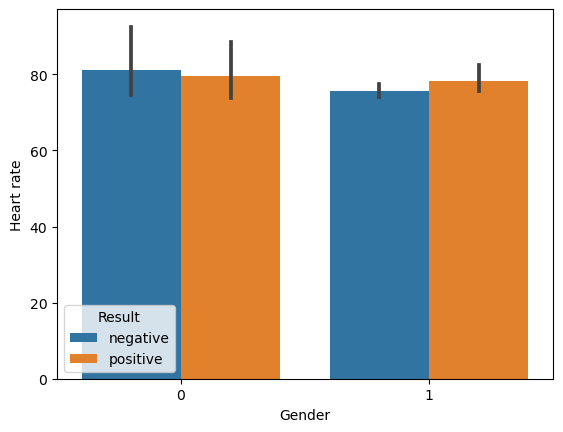

In [10]:
sns.barplot(x=data['Gender'],y=data['Heart rate'],hue=data['Result'])

<Axes: xlabel='Gender', ylabel='Age'>

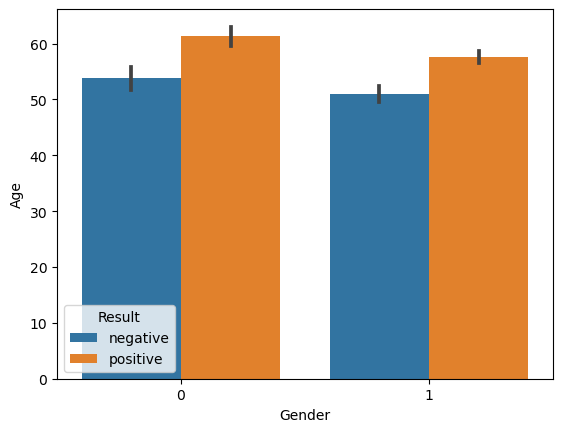

In [11]:
sns.barplot(x=data['Gender'],y=data['Age'],hue=data['Result'])

<Axes: xlabel='Gender', ylabel='Systolic blood pressure'>

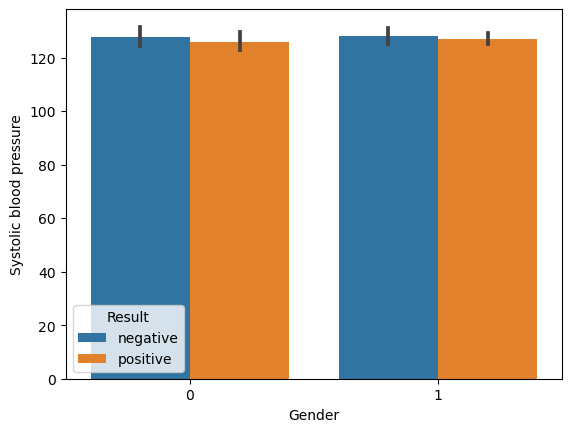

In [12]:
sns.barplot(x=data['Gender'],y=data['Systolic blood pressure'],hue=data['Result'])

<Axes: xlabel='Gender', ylabel='Diastolic blood pressure'>

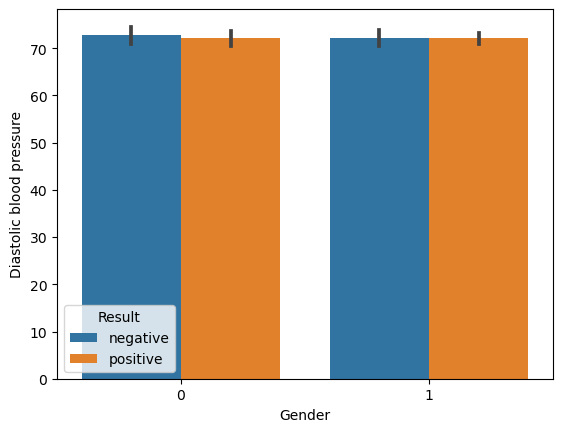

In [13]:
sns.barplot(x=data['Gender'],y=data['Diastolic blood pressure'],hue=data['Result'])

<Axes: xlabel='Gender', ylabel='Blood sugar'>

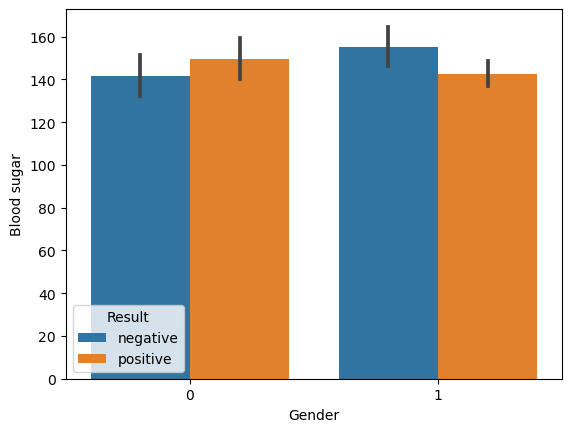

In [14]:
sns.barplot(x=data['Gender'],y=data['Blood sugar'],hue=data['Result'])

<Axes: xlabel='Gender', ylabel='CK-MB'>

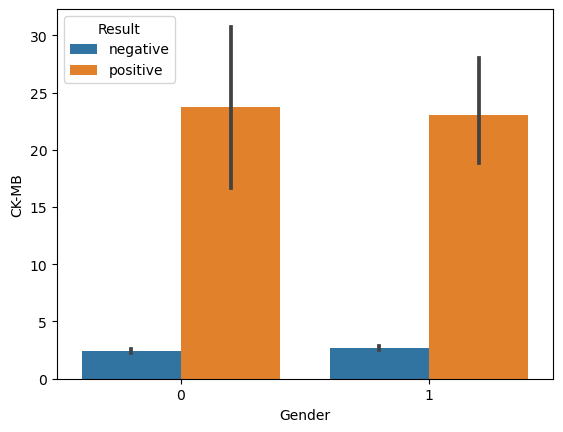

In [15]:
sns.barplot(x=data['Gender'],y=data['CK-MB'],hue=data['Result'])

<Axes: xlabel='Gender', ylabel='Troponin'>

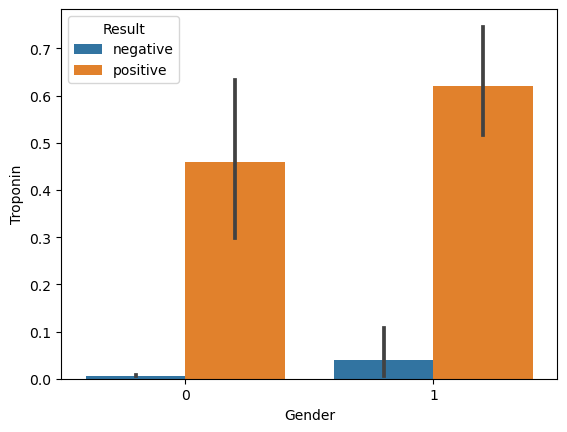

In [16]:
sns.barplot(x=data['Gender'],y=data['Troponin'],hue=data['Result'])

In [17]:
data

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


<Axes: xlabel='Gender', ylabel='count'>

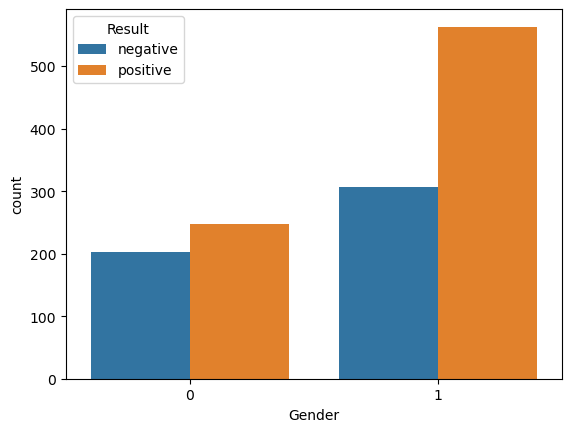

In [18]:
sns.countplot(x=data['Gender'],hue=data['Result'])

In [19]:
label_df=data.groupby(["Gender","Result"]).size().index

In [20]:
val_df=data.groupby(["Gender","Result"]).size().values

In [21]:
label_df

MultiIndex([(0, 'negative'),
            (0, 'positive'),
            (1, 'negative'),
            (1, 'positive')],
           names=['Gender', 'Result'])

In [22]:
val_df

array([202, 247, 307, 563], dtype=int64)

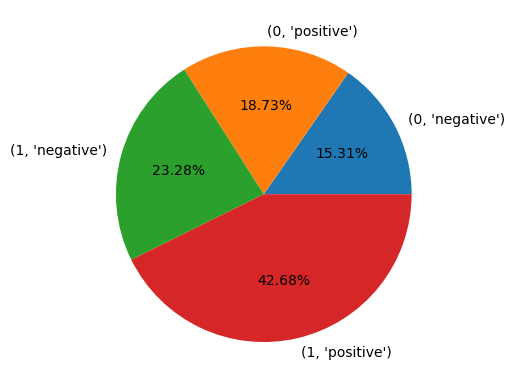

In [23]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [24]:
data

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


<Axes: xlabel='Gender', ylabel='Age'>

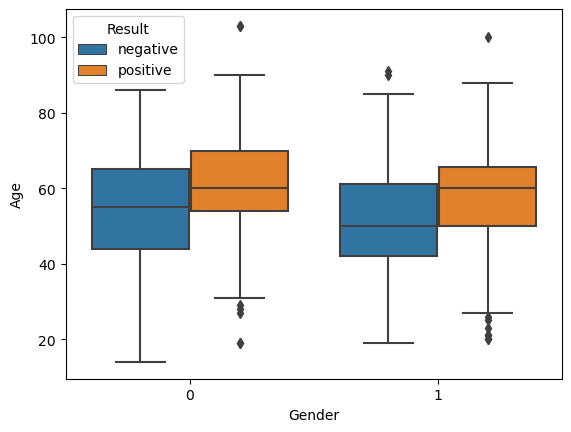

In [25]:
sns.boxplot(x=data['Gender'],y=data['Age'],hue=data['Result'])

<Axes: xlabel='Gender', ylabel='Heart rate'>

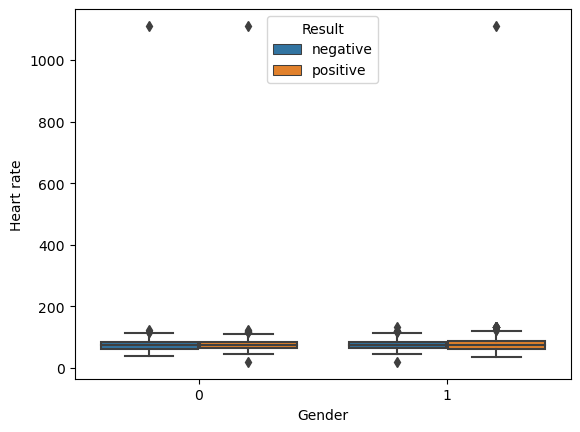

In [26]:
sns.boxplot(x=data['Gender'],y=data['Heart rate'],hue=data['Result'])

<Axes: xlabel='Gender', ylabel='Systolic blood pressure'>

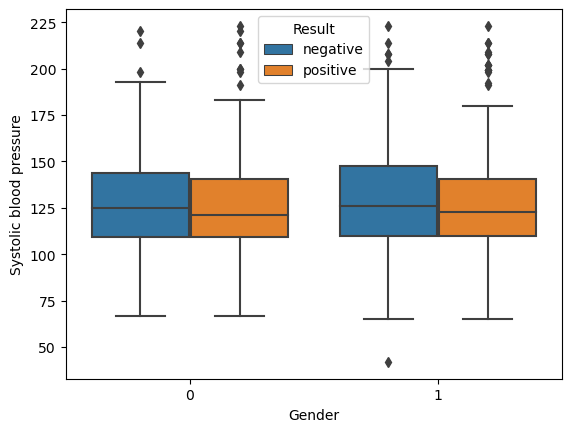

In [27]:
sns.boxplot(x=data['Gender'],y=data['Systolic blood pressure'],hue=data['Result'])

<Axes: xlabel='Gender', ylabel='Diastolic blood pressure'>

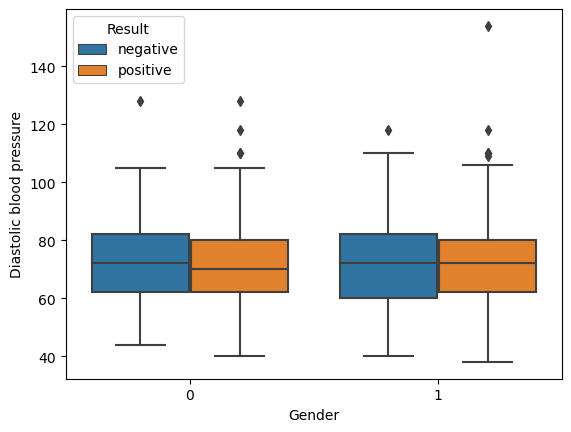

In [28]:
sns.boxplot(x=data['Gender'],y=data['Diastolic blood pressure'],hue=data['Result'])

<Axes: xlabel='Gender', ylabel='Blood sugar'>

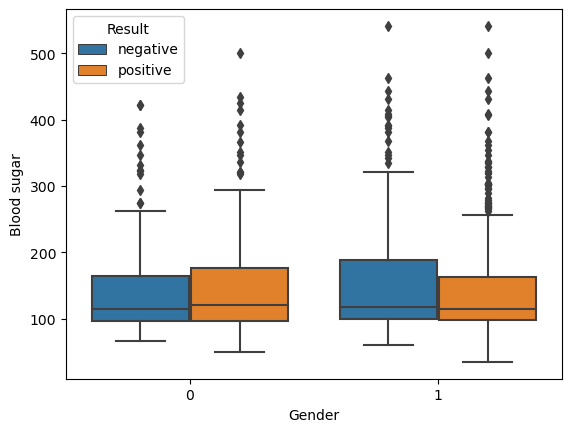

In [29]:
sns.boxplot(x=data['Gender'],y=data['Blood sugar'],hue=data['Result'])

<Axes: xlabel='Gender', ylabel='CK-MB'>

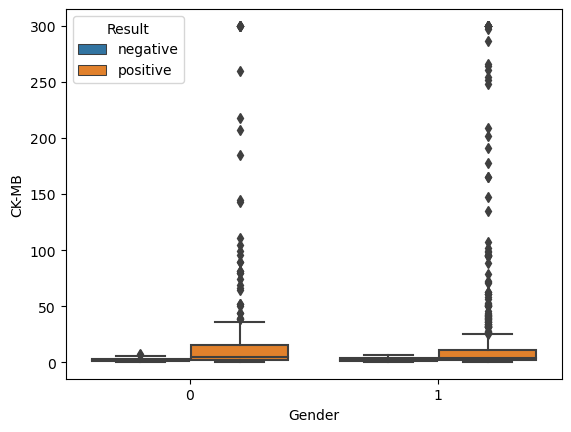

In [30]:
sns.boxplot(x=data['Gender'],y=data['CK-MB'],hue=data['Result'])

<Axes: xlabel='Gender', ylabel='Troponin'>

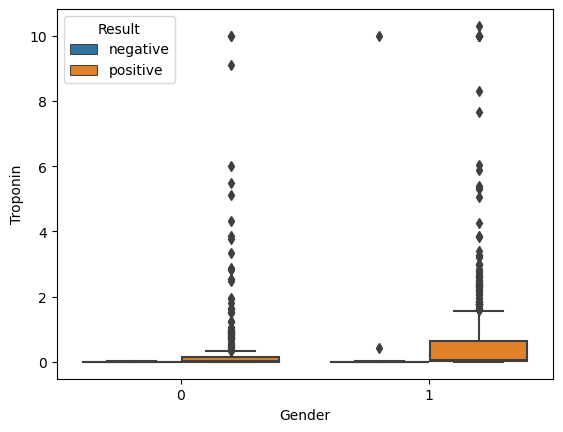

In [31]:
sns.boxplot(x=data['Gender'],y=data['Troponin'],hue=data['Result'])

In [32]:
data

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


<Axes: xlabel='Result', ylabel='Age'>

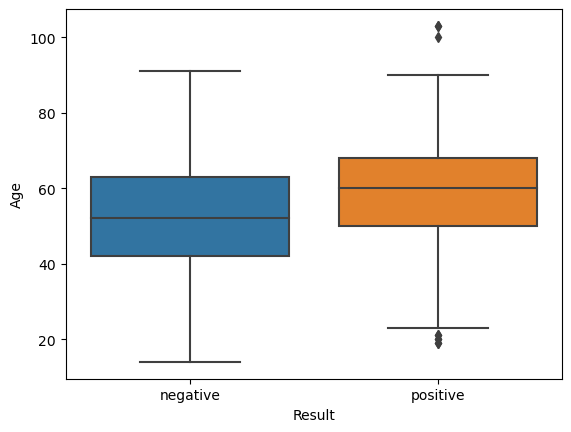

In [33]:
sns.boxplot(x=data['Result'],y=data['Age'])

<Axes: xlabel='Result', ylabel='Heart rate'>

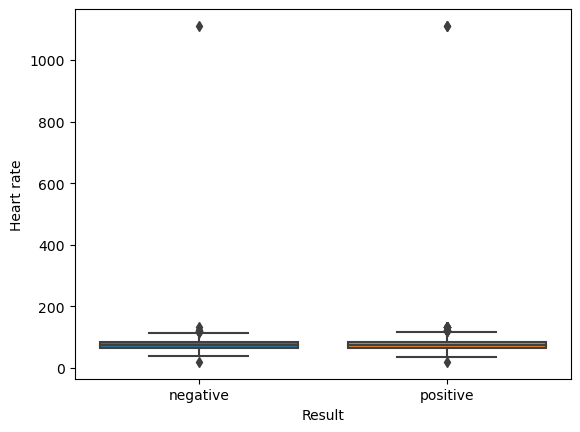

In [34]:
sns.boxplot(x=data['Result'],y=data['Heart rate'])

<Axes: xlabel='Result', ylabel='Systolic blood pressure'>

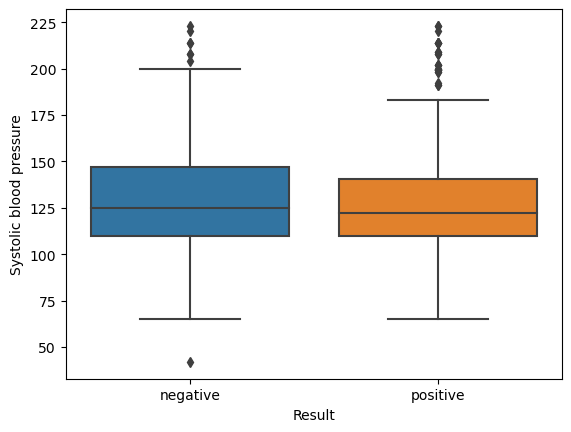

In [35]:
sns.boxplot(x=data['Result'],y=data['Systolic blood pressure'])

<Axes: xlabel='Result', ylabel='Diastolic blood pressure'>

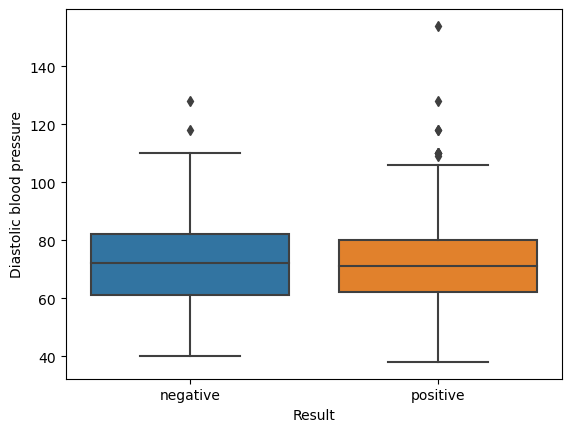

In [36]:
sns.boxplot(x=data['Result'],y=data['Diastolic blood pressure'])

<Axes: xlabel='Result', ylabel='Blood sugar'>

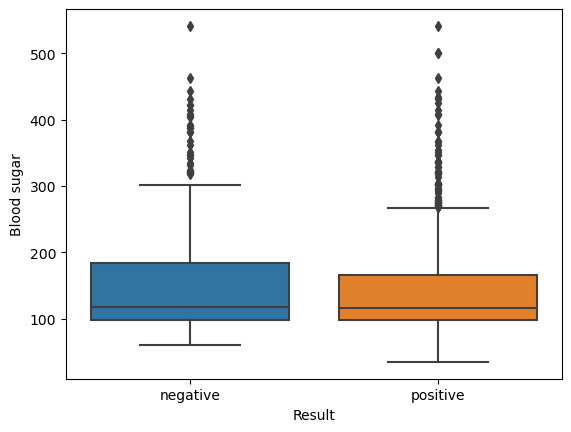

In [37]:
sns.boxplot(x=data['Result'],y=data['Blood sugar'])

<Axes: xlabel='Result', ylabel='CK-MB'>

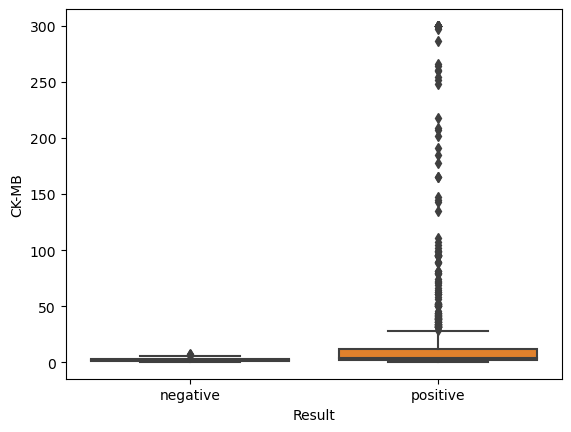

In [38]:
sns.boxplot(x=data['Result'],y=data['CK-MB'])

<Axes: xlabel='Result', ylabel='Troponin'>

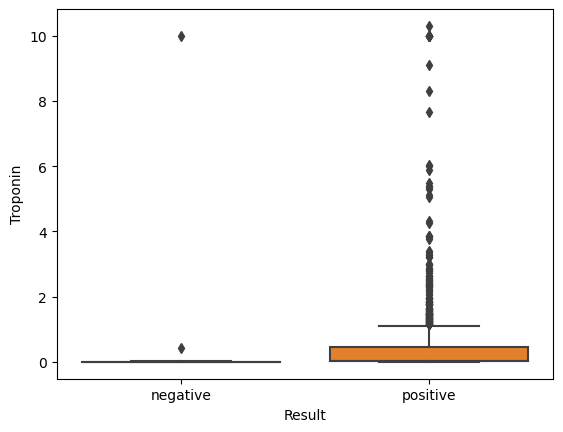

In [39]:
sns.boxplot(x=data['Result'],y=data['Troponin'])

In [40]:
data

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

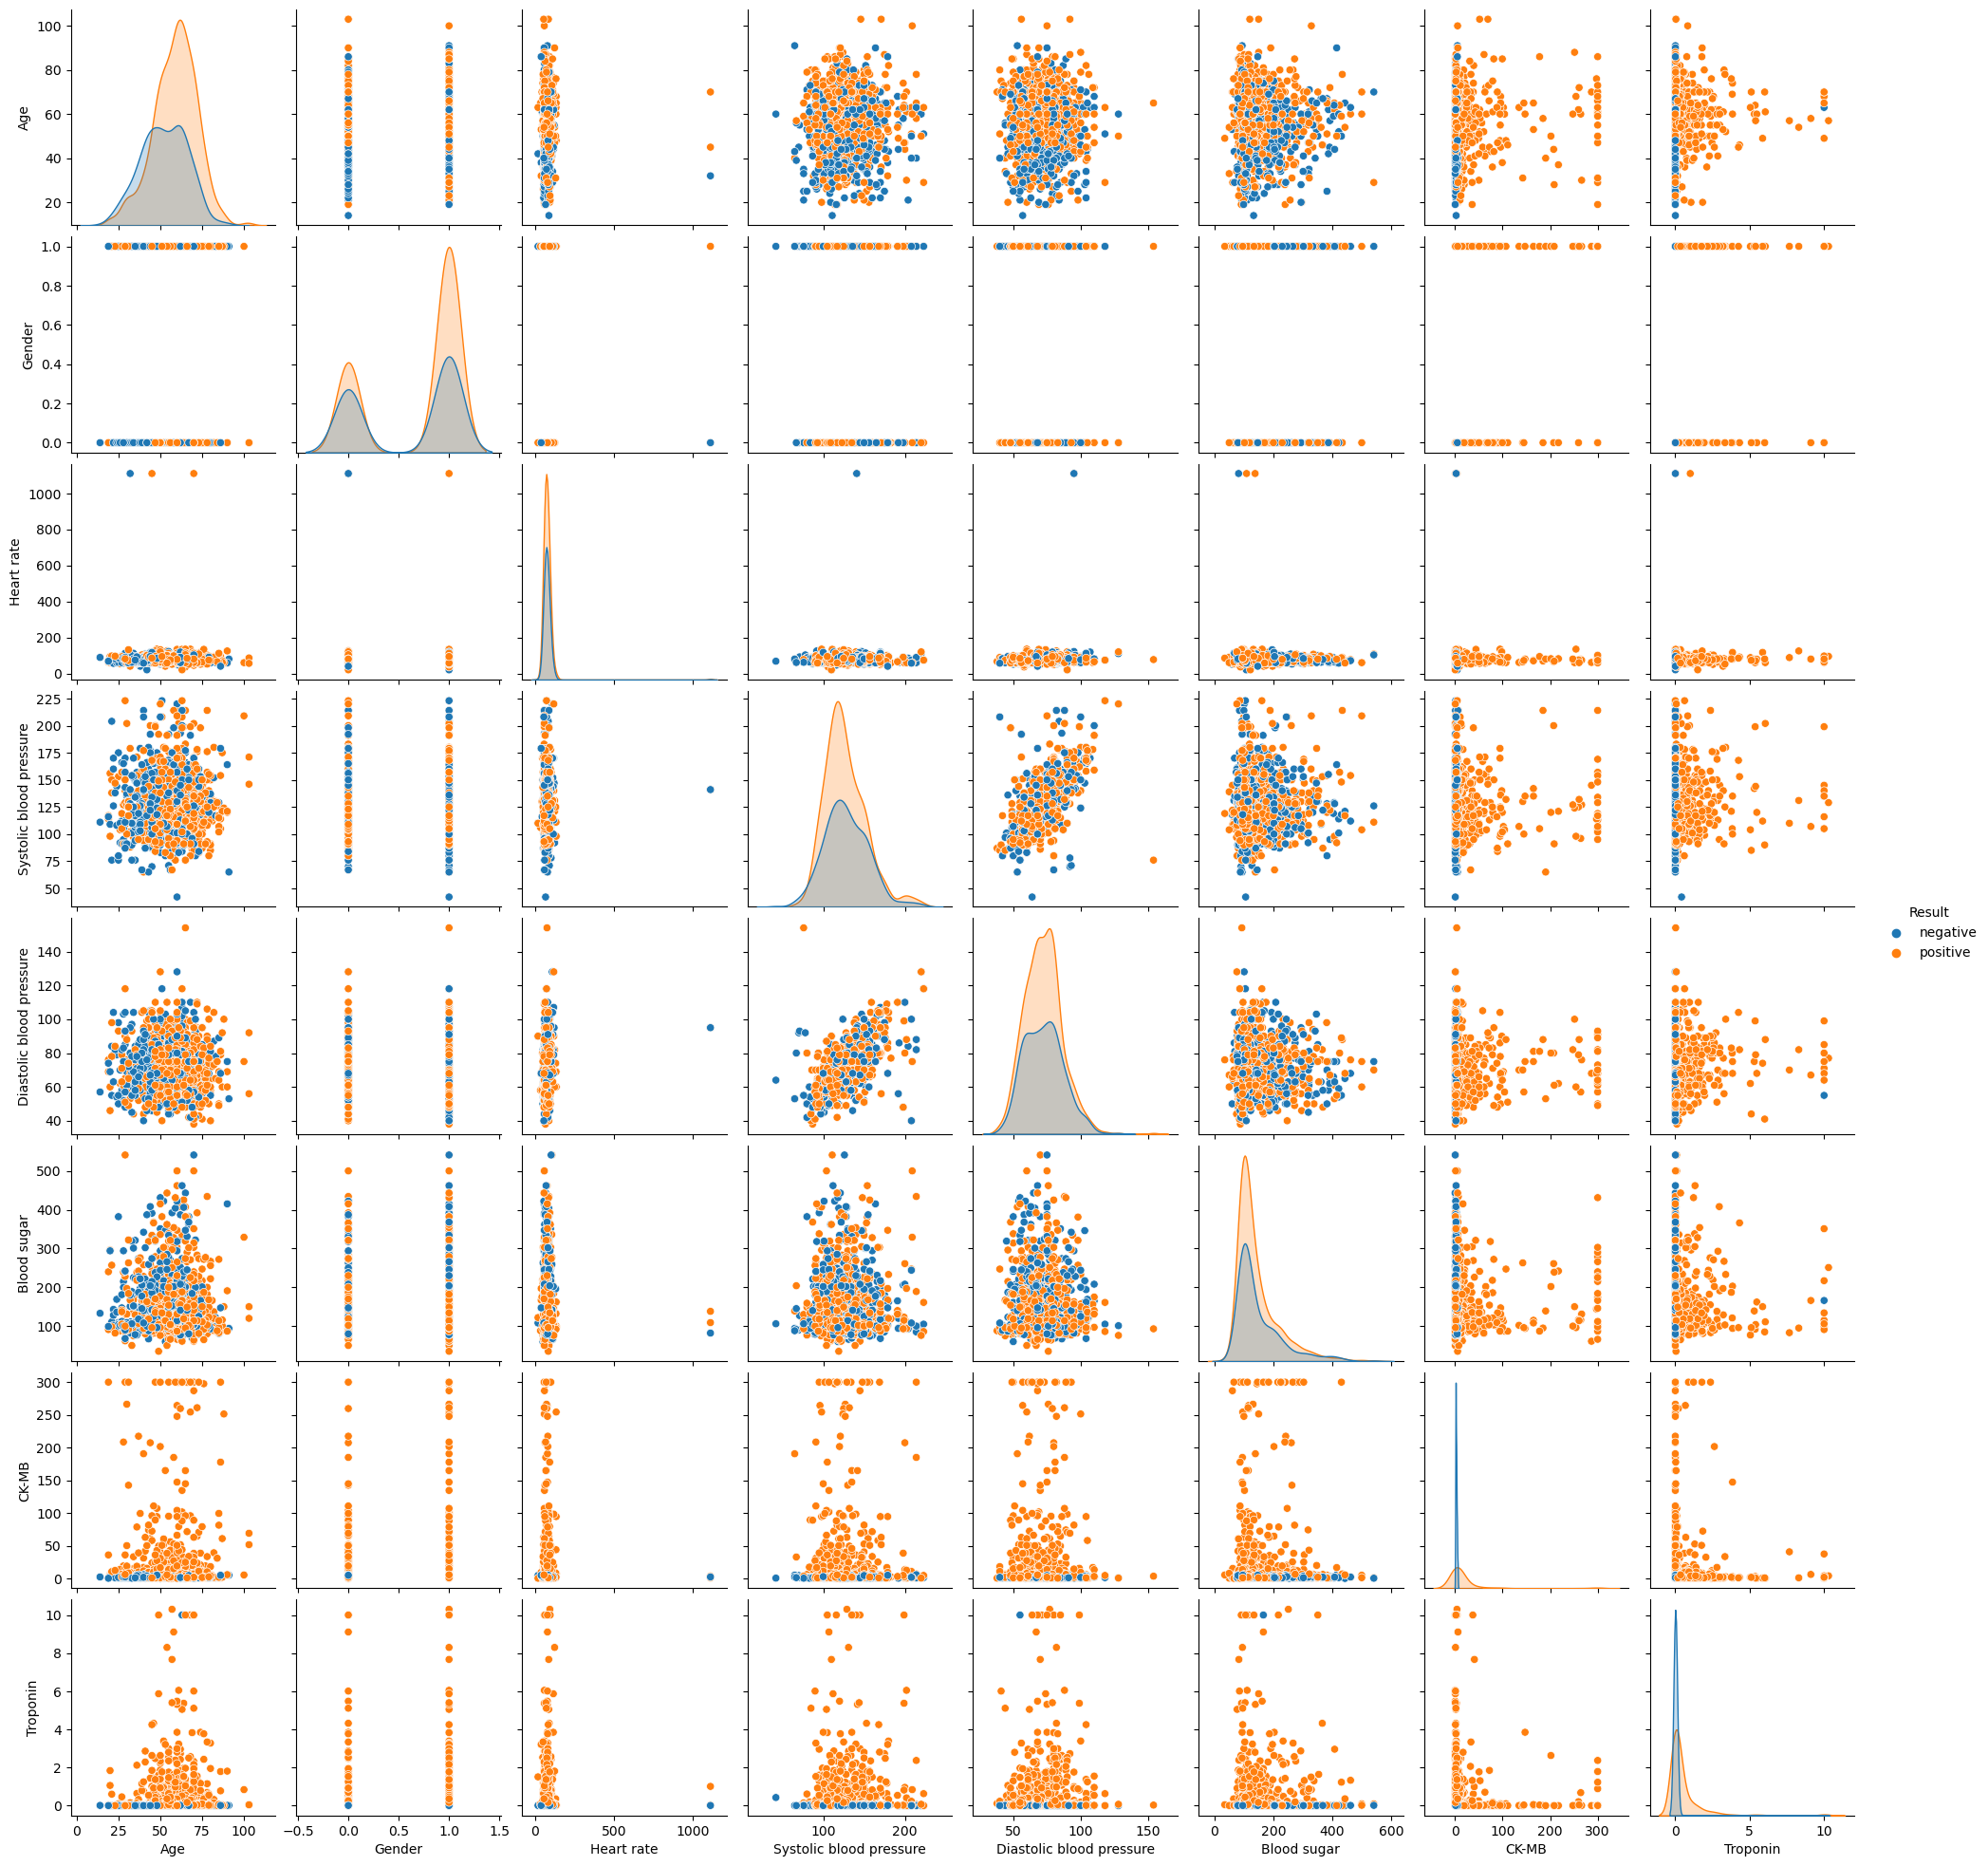

In [41]:
sns.pairplot(data,hue='Result')

In [42]:
object_columns = data.select_dtypes(include=['object'])


In [43]:
numeric_columns = data.select_dtypes(include=['number'])


In [44]:
object_columns

,Result
0,negative
1,positive
2,negative
3,positive
4,negative
...,...
1314,negative
1315,positive
1316,positive
1317,positive


In [45]:
numeric_columns

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
0,63,1,66,160,83,160.0,1.80,0.012
1,20,1,94,98,46,296.0,6.75,1.060
2,56,1,64,160,77,270.0,1.99,0.003
3,66,1,70,120,55,270.0,13.87,0.122
4,54,1,64,112,65,300.0,1.08,0.003
...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006
1315,66,1,84,125,55,149.0,1.33,0.172
1316,45,1,85,168,104,96.0,1.24,4.250
1317,54,1,58,117,68,443.0,5.80,0.359


<Axes: >

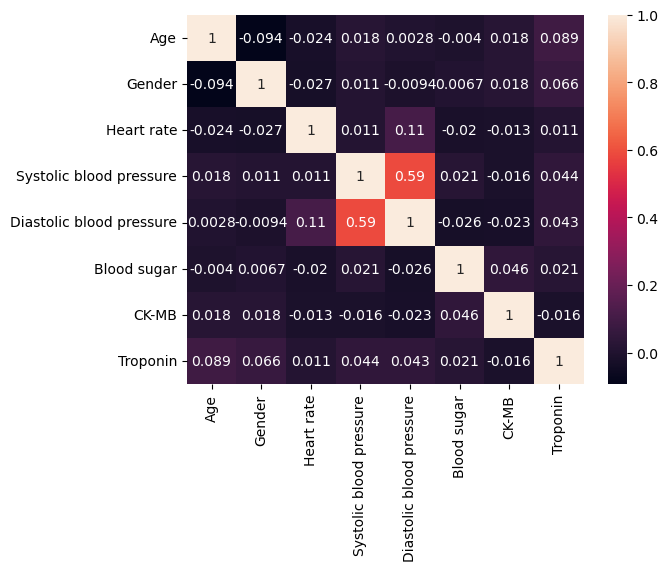

In [46]:
sns.heatmap(numeric_columns.corr(),annot=True)

In [47]:
data

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


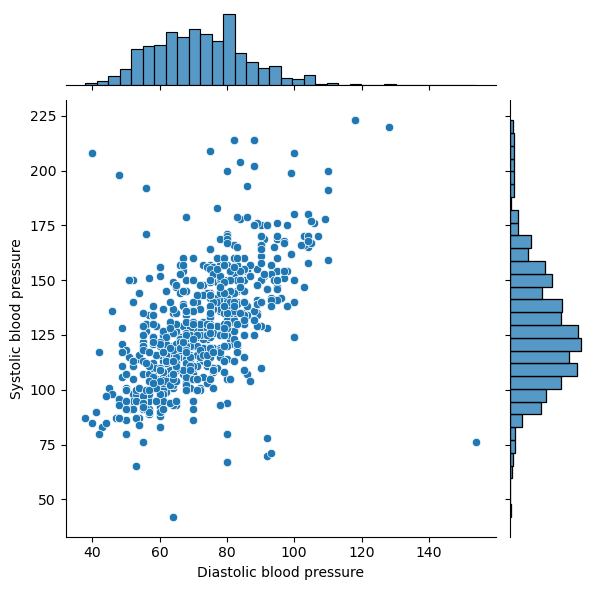

In [48]:
sns.jointplot(x="Diastolic blood pressure", y="Systolic blood pressure", data=data, kind="scatter")


In [49]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keep only the data points that are within the bounds
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return filtered_data

In [50]:
# Loop through columns to remove outliers from numeric columns
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        data = remove_outliers_iqr(data, column)

In [51]:
data

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
2,56,1,64,160,77,270.0,1.99,0.003,negative
5,52,0,61,112,58,87.0,1.83,0.004,negative
6,38,0,40,179,68,102.0,0.71,0.003,negative
8,49,0,60,154,81,135.0,2.35,0.004,negative
...,...,...,...,...,...,...,...,...,...
1311,85,1,112,115,69,114.0,2.19,0.062,positive
1312,48,1,84,118,68,96.0,5.33,0.006,negative
1313,86,0,40,179,68,147.0,5.22,0.011,negative
1314,44,1,94,122,67,204.0,1.63,0.006,negative


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le=LabelEncoder()

In [54]:
data['Result']=le.fit_transform(data['Result'])

In [55]:
data

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,0
2,56,1,64,160,77,270.0,1.99,0.003,0
5,52,0,61,112,58,87.0,1.83,0.004,0
6,38,0,40,179,68,102.0,0.71,0.003,0
8,49,0,60,154,81,135.0,2.35,0.004,0
...,...,...,...,...,...,...,...,...,...
1311,85,1,112,115,69,114.0,2.19,0.062,1
1312,48,1,84,118,68,96.0,5.33,0.006,0
1313,86,0,40,179,68,147.0,5.22,0.011,0
1314,44,1,94,122,67,204.0,1.63,0.006,0


In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc=StandardScaler()


In [58]:
X=data.drop("Result",axis=1)

In [59]:
y=data['Result']

In [60]:
X

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
0,63,1,66,160,83,160.0,1.80,0.012
2,56,1,64,160,77,270.0,1.99,0.003
5,52,0,61,112,58,87.0,1.83,0.004
6,38,0,40,179,68,102.0,0.71,0.003
8,49,0,60,154,81,135.0,2.35,0.004
...,...,...,...,...,...,...,...,...
1311,85,1,112,115,69,114.0,2.19,0.062
1312,48,1,84,118,68,96.0,5.33,0.006
1313,86,0,40,179,68,147.0,5.22,0.011
1314,44,1,94,122,67,204.0,1.63,0.006


In [61]:
y

0       0
2       0
5       0
6       0
8       0
       ..
1311    1
1312    0
1313    0
1314    0
1315    1
Name: Result, Length: 788, dtype: int32

In [62]:
X=sc.fit_transform(X)


In [63]:
X

array([[ 0.53924483,  0.77564555, -0.6490376 , ...,  0.61898128,
        -0.61137064, -0.31048947],
       [ 0.02843005,  0.77564555, -0.79336994, ...,  2.90635387,
        -0.52300878, -0.5877485 ],
       [-0.26346412, -1.28924868, -1.00986844, ..., -0.89900234,
        -0.59741877, -0.55694194],
       ...,
       [ 2.21763628, -1.28924868, -2.52535797, ...,  0.34865543,
         0.97914299, -0.34129603],
       [-0.84725244,  0.77564555,  1.3716151 , ...,  1.53393032,
        -0.69043126, -0.49532882],
       [ 0.75816546,  0.77564555,  0.64995342, ...,  0.39024402,
        -0.82995   ,  4.61856012]])

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr=LogisticRegression()


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
X_train.shape

(527, 8)

In [70]:
X_test.shape

(261, 8)

In [71]:
y_train.shape

(527,)

In [72]:
y_test.shape

(261,)

In [73]:
lr.fit(X_train,y_train)

LogisticRegression()

In [74]:
y_pred=lr.predict(X_test)


In [75]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [80]:
accuracy_score(y_test,y_pred)

0.9425287356321839

In [82]:
cm=confusion_matrix(y_test,y_pred)

In [83]:
cm

array([[145,   3],
       [ 12, 101]], dtype=int64)

<Axes: >

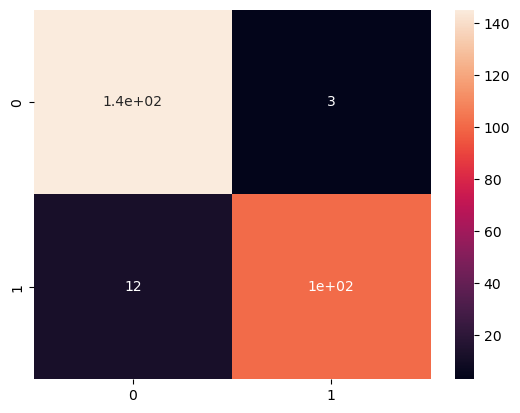

In [88]:
sns.heatmap(cm,annot=True)

In [90]:
import tensorflow as tf
from tensorflow import keras
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

model=keras.Sequential([
    keras.layers.Dense(30,input_shape=(8,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')    

]
)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/100


17/17 [==============================] - 2s 21ms/step - loss: 0.6833 - accuracy: 0.5939 - val_loss: 0.6398 - val_accuracy: 0.6284
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6269 - accuracy: 0.6584 - val_loss: 0.5911 - val_accuracy: 0.6973
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.5820 - accuracy: 0.7154 - val_loss: 0.5504 - val_accuracy: 0.7280
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5422 - accuracy: 0.7609 - val_loss: 0.5152 - val_accuracy: 0.7586
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.5065 - accuracy: 0.8008 - val_loss: 0.4856 - val_accuracy: 0.7739
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4732 - accuracy: 0.8027 - val_loss: 0.4568 - val_accuracy: 0.7969
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4421 - accuracy: 0.8197 - val_loss: 0.4315 - val_accuracy: 0.8161
Epoch 8/10

In [91]:
predictions = model.predict(X_test)


9/9 [==============================] - 0s 1ms/step


In [92]:
binary_predictions = (predictions > 0.5).astype(int)


In [93]:
accuracy = accuracy_score(y_test, binary_predictions)  # Change binary_predictions to your predictions


In [94]:
accuracy

0.9501915708812261

In [95]:
cm=confusion_matrix(y_test,binary_predictions)

In [96]:
cm

array([[142,   6],
       [  7, 106]], dtype=int64)

<Axes: >

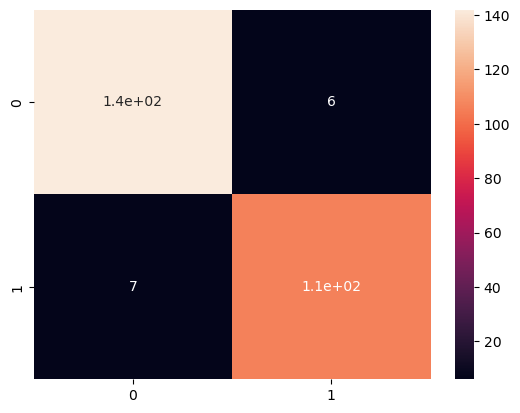

In [97]:
sns.heatmap(cm,annot=True)